In [1]:
import argparse
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
from torchvision import transforms
import torch

device = torch.device('cuda')

In [3]:
from data_loader.face_datasets import InsightFaceBinaryImg
from model.model import xCosModel

from GradCam import FaceGradCam

In [4]:
data_dir = "../datasets/face/faces_emore/"
data_name = 'lfw'
backbone_arc = "../pretrained_model/baseline/model_ir_se50.pth"
trsfm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [5]:
dataset = InsightFaceBinaryImg(data_dir, data_name, trsfm)

In [6]:
model = xCosModel().to(device)
# model.backbone.load_state_dict(torch.load(args.backbone), strict=True)
# model.attention.load_state_dict(torch.load(args.atten), strict=True)
model.backbone_target.load_state_dict(torch.load(backbone_arc))
model = model.eval()

In [7]:
fgc = FaceGradCam(model.backbone_target)

In [8]:
data = dataset[20]
img1, img2 = data['data_input']
data['is_same_labels']

True

In [9]:
# Make heat map, batch operation is supported
hm1, hm2 = fgc(img1.unsqueeze(0).to(device), img2.unsqueeze(0).to(device))

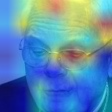

In [10]:
# Show heat map with image, batch operation is NOT supported
fgc.make_img(hm1[0], (112, 112), img1)

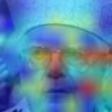

In [11]:
fgc.make_img(hm2[0], (112, 112), img2)